In [93]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import zipfile
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



zf = zipfile.ZipFile('Data_incidents.csv.zip') 
data = pd.read_csv('Data_incidents.csv.zip').reset_index()

/Users/Anna/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Extract mass shooting incidents

In [94]:
mass_shootings = data[data['Mass Shooting']==True]
mass_shootings

,index,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,...,Officer Involved Shooting - Bystander killed,Child injured,Gun buy back action,Terrorism Involvement,Officer Involved Shooting - Accidental discharge - no injury required,Mistaken ID,Officer Involved Shooting - subject/suspect/perpetrator suicide by cop,Ghost gun,Political Violence,NAV
0,0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,...,False,False,False,False,False,False,False,False,False,False
1,1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,...,False,False,False,False,False,False,False,False,False,False
5,5,5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,...,False,False,False,False,False,False,False,False,False,False
6,6,6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,...,False,False,False,False,False,False,False,False,False,False
7,7,7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,...,False,False,False,False,False,False,False,False,False,False
8,8,8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,...,False,False,False,False,False,False,False,False,False,False
9,9,9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,...,False,False,False,False,False,False,False,False,False,False
10,10,10,491674,2013-01-23,Tennessee,Chattanooga,1501 Dodds Ave,1,3,http://www.gunviolencearchive.org/incident/491674,...,False,False,False,False,False,False,False,False,False,False
11,11,11,479413,2013-01-25,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,http://www.gunviolencearchive.org/incident/479413,...,False,False,False,False,False,False,False,False,False,False
12,12,12,479561,2013-01-26,Louisiana,Charenton,1000 block of Flat Town Road,2,3,http://www.gunviolencearchive.org/incident/479561,...,False,False,False,False,False,False,False,False,False,False


In [83]:
len(mass_shootings)

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,Officer Involved Shooting - Bystander killed,Child injured,Gun buy back action,Terrorism Involvement,Officer Involved Shooting - Accidental discharge - no injury required,Mistaken ID,Officer Involved Shooting - subject/suspect/perpetrator suicide by cop,Ghost gun,Political Violence,NAV
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,False,False,False,False,False,False,False,False,False,False
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,False,False,False,False,False,False,False,False,False,False
2,5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,...,False,False,False,False,False,False,False,False,False,False
3,6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,...,False,False,False,False,False,False,False,False,False,False
4,7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,...,False,False,False,False,False,False,False,False,False,False
5,8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,...,False,False,False,False,False,False,False,False,False,False
6,9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,http://www.abc2news.com/news/crime-checker/bal...,...,False,False,False,False,False,False,False,False,False,False
7,10,491674,2013-01-23,Tennessee,Chattanooga,1501 Dodds Ave,1,3,http://www.gunviolencearchive.org/incident/491674,http://www.wrcbtv.com/story/22664154/one-dead-...,...,False,False,False,False,False,False,False,False,False,False
8,11,479413,2013-01-25,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,http://www.gunviolencearchive.org/incident/479413,http://stlouis.cbslocal.com/2013/01/25/one-dea...,...,False,False,False,False,False,False,False,False,False,False
9,12,479561,2013-01-26,Louisiana,Charenton,1000 block of Flat Town Road,2,3,http://www.gunviolencearchive.org/incident/479561,http://www.huffingtonpost.com/2013/01/27/wilbe...,...,False,False,False,False,False,False,False,False,False,False


## Incidents over time

In [85]:
mass_shootings.date.count()

1637

In [92]:
inc_time = mass_shootings.groupby('date')['index'].nunique()

0         2013-01-01
1         2013-01-01
5         2013-01-07
6         2013-01-19
7         2013-01-21
8         2013-01-21
9         2013-01-23
10        2013-01-23
11        2013-01-25
12        2013-01-26
13        2013-01-26
14        2013-01-26
15        2013-02-02
16        2013-02-03
17        2013-02-07
18        2013-02-09
19        2013-02-11
20        2013-02-11
21        2013-02-12
22        2013-02-19
23        2013-02-21
24        2013-02-22
25        2013-02-23
26        2013-02-24
27        2013-03-02
28        2013-03-03
29        2013-03-03
30        2013-03-04
31        2013-03-05
32        2013-03-07
             ...    
231510    2018-02-05
231712    2018-02-07
232157    2018-02-10
232234    2018-02-11
232564    2018-02-13
232745    2018-02-14
232947    2018-02-16
233122    2018-02-17
233160    2018-02-17
233203    2018-02-18
234124    2018-02-23
234555    2018-02-26
234687    2018-02-27
235305    2018-03-03
235324    2018-03-03
235364    2018-03-04
235846    201

In [74]:
inc_time = inc_time.to_frame()
inc_time.reset_index(level=0, inplace=True)

In [77]:
#check sum
inc_time['index'].sum()

KeyError: 'index'

In [9]:
# format date
inc_time['Date'] = pd.to_datetime(inc_time.date.str.strip(), format = '%Y-%m-%d')#
inc_time.drop(['date'], axis=1);

In [10]:
# Create new date columns
inc_time['Year'] = inc_time.Date.apply(lambda x: x.year)
inc_time['Month'] = inc_time.Date.apply(lambda x: x.month)
inc_time['Year_Month'] = inc_time.Date.apply(lambda x: 100*x.year + x.month)

In [11]:
inc_time.head(2)

,date,index,Date,Year,Month,Year_Month
0,2013-01-01,2,2013-01-01,2013,1,201301
1,2013-01-07,1,2013-01-07,2013,1,201301


In [12]:
inc_year = inc_time.groupby('Year').index.sum()
inc_ym = inc_time.groupby('Year_Month').index.sum()

In [13]:
type(inc_year)

pandas.core.series.Series

In [14]:
year_month = inc_ym.to_frame()
year_month.reset_index(level=0, inplace=True)
#year_month['group'] = year_month['Year_Month'].apply(lambda x: x[1:2])

Text(0,0.5,'Incidents')

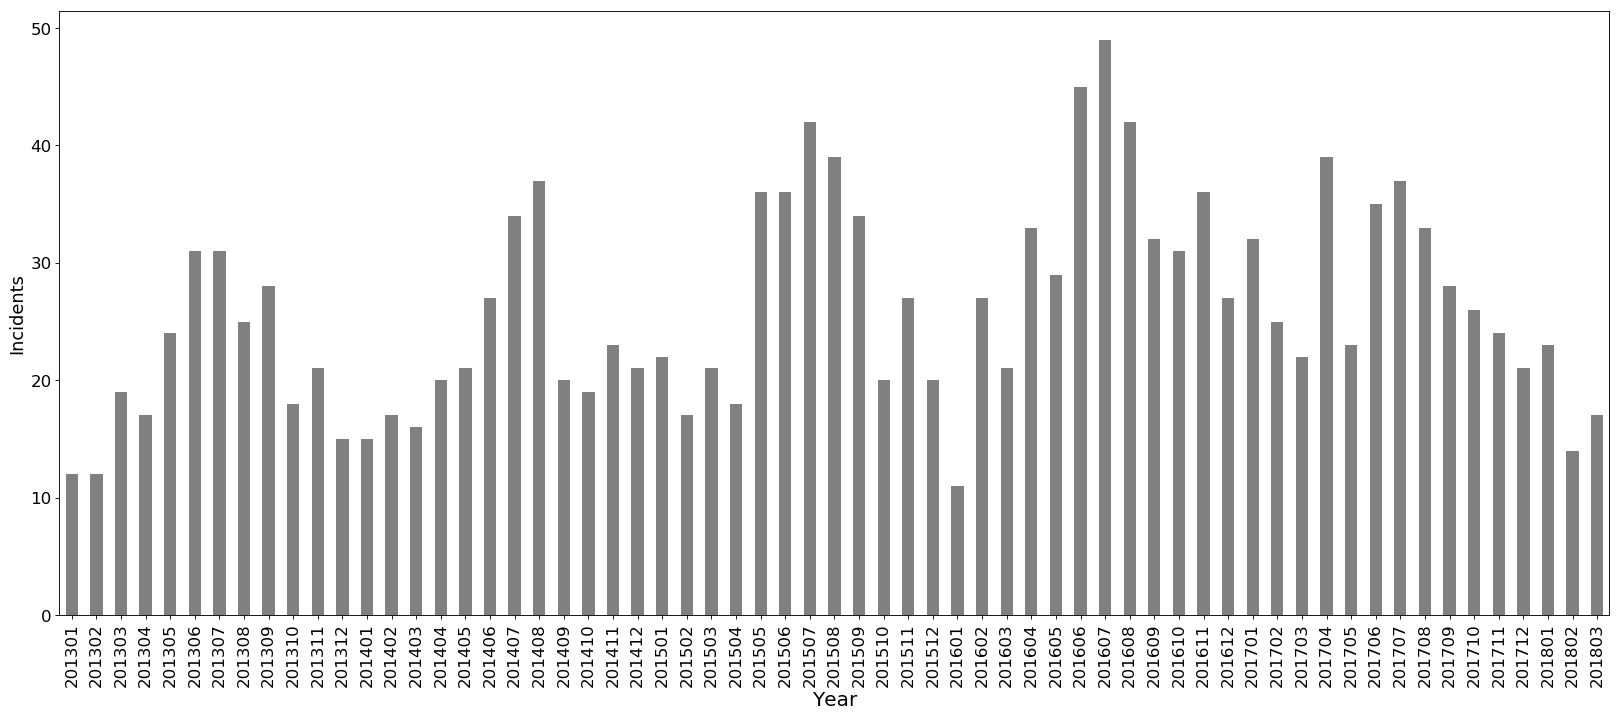

In [118]:
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

plt.figure(num=None, figsize=(25, 10), dpi=80, facecolor='w', edgecolor='k')
inc_ym.plot.bar(color='grey',linewidth = '1')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Incidents', fontsize=16)





In [16]:
inc_all = data.date
inc_all = inc_all.to_frame()
inc_all['counts'] = 1

In [17]:
inc_all['Date'] = pd.to_datetime(inc_all.date.str.strip(), format = '%Y-%m-%d')#
inc_all.drop(['date'], axis=1);

In [18]:
inc_all['Year'] = inc_all.Date.apply(lambda x: x.year)
inc_all['Year_Month'] = inc_all.Date.apply(lambda x: 100*x.year + x.month)

In [19]:
all_YM = inc_all.groupby('Year_Month').counts.sum()

In [21]:
type(all_YM)

pandas.core.series.Series

In [22]:
type(inc_ym)

pandas.core.series.Series

In [39]:
all_YM_pd = all_YM.to_frame()
all_YM_pd.reset_index(level=0, inplace=True)
all_YM_pd.columns = ['Year_Month', 'inc_all']
ms_YM_pd = inc_ym.to_frame()
ms_YM_pd.reset_index(level=0, inplace=True)
ms_YM_pd.columns = ['Year_Month', 'inc_ms']

In [95]:
YM = pd.merge(all_YM_pd, ms_YM_pd, on='Year_Month')
YM = YM.loc[12:, ['Year_Month','inc_all', 'inc_ms']] # remove 2013 from data
len(YM)

51

In [175]:
mass_shootings['victims'] = mass_shootings.n_killed + mass_shootings.n_injured


/Users/Anna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


103

In [180]:
max_vic = mass_shootings.victims.max()
mass_shootings[mass_shootings['victims']==max_vic]

,index,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,...,Child injured,Gun buy back action,Terrorism Involvement,Officer Involved Shooting - Accidental discharge - no injury required,Mistaken ID,Officer Involved Shooting - subject/suspect/perpetrator suicide by cop,Ghost gun,Political Violence,NAV,victims
130448,130448,130448,577157,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53,http://www.gunviolencearchive.org/incident/577157,...,False,False,True,False,False,False,False,False,False,103


In [189]:
mass_shootings.groupby('victims')['index'].nunique()

victims
4      924
5      399
6      125
7       87
8       40
9       19
10       8
11       3
12       8
13       3
14       2
15       3
16       1
17       2
18       3
19       2
20       1
21       1
25       1
27       1
34       1
35       1
47       1
103      1
Name: index, dtype: int64

TypeError: 'numpy.ndarray' object is not callable

In [100]:
ms_states = mass_shootings.groupby('state')['index'].nunique()
ms_states.sort_values(ascending=False)

state
California              194
Illinois                151
Florida                 116
Texas                    97
New York                 78
Georgia                  69
Pennsylvania             65
Louisiana                63
Tennessee                62
Ohio                     62
Michigan                 59
Missouri                 52
New Jersey               47
North Carolina           43
Virginia                 42
Indiana                  41
Maryland                 37
South Carolina           36
Alabama                  35
Mississippi              28
District of Columbia     26
Kentucky                 23
Arizona                  20
Washington               19
Minnesota                17
Connecticut              15
Oklahoma                 15
Kansas                   15
Colorado                 14
Massachusetts            13
Arkansas                 11
New Mexico               11
Wisconsin                10
Nevada                   10
Delaware                  7
Oregon        

In [6]:
for col in mass_shootings.columns:
    print(col)

index
Unnamed: 0
incident_id
date
state
city_or_county
address
n_killed
n_injured
incident_url
source_url
incident_url_fields_missing
congressional_district
gun_stolen
gun_type
incident_characteristics
latitude
location_description
longitude
n_guns_involved
notes
participant_age
participant_age_group
participant_gender
participant_name
participant_relationship
participant_status
participant_type
sources
state_house_district
state_senate_district
Shot - Wounded/Injured
Mass Shooting
Possession
Possession of gun by felon or prohibited person
Shot - Dead
Gang involvement
Shots Fired - No Injuries
Bar/club incident - in or around establishment
Officer Involved Incident
Officer Involved Shooting - subject/suspect/perpetrator killed
Drug involvement
Kidnapping/abductions/hostage
Under the influence of alcohol or drugs
Suicide
Murder/Suicide
Attempted Murder/Suicide
Domestic Violence
Home Invasion
Home Invasion - Resident killed
Armed robbery with injury/death and/or evidence of DGU found
Dri